# Лабораторная работа № 3 "Регрессионный анализ данных"

## Береснева Мария Андреевна гр. 18-ИВТ-2
### Вариант 3.

In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import (cross_val_score, StratifiedKFold,
                                     train_test_split)
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

from scipy.stats import pearsonr, spearmanr
%matplotlib inline

In [3]:
df = pd.read_csv('autos.csv', encoding = 'latin1')  #  Создание объекта набора данных

In [4]:
df.head(3)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46


# 1. Описание набора данных

dateCrawled : when this ad was first crawled, all field-values are taken from this date

name : "имя" автомобиля

seller : частный или дилер

offerType

price : цена объявления о продаже автомобиля

abtest

vehicleType

yearOfRegistration : в каком году автомобиль был впервые зарегистрирован

коробка передач

powerPS : мощность машины в PS

model

kilometer : сколько километров машина проехала

monthOfRegistration : в каком месяце автомобиль был впервые зарегистрирован

brand

notRepairedDamage : если у автомобиля есть повреждение, которое еще не отремонтировано

dateCreated : дата, на которую было создано объявление на ebay

nrOfPictures : количество картинок в объявлении (к сожалению, это поле везде содержит 0 и, таким образом, бесполезно (ошибка в сканере!))

postalCode

lastSeenOnline : огда сканер видел это объявление в последний раз

Поля lastSeen и dateCreated могут быть использованы для оценки того, как долго машина будет находиться в сети, по крайней мере, до ее продажи.

# 2. Удалите дубликаты строк в наборе данных. Приведите размер набора данных до и после данной операции

In [5]:
df.shape

(371528, 20)

In [6]:
df.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
dateCrawled            371528 non-null object
name                   371528 non-null object
seller                 371528 non-null object
offerType              371528 non-null object
price                  371528 non-null int64
abtest                 371528 non-null object
vehicleType            333659 non-null object
yearOfRegistration     371528 non-null int64
gearbox                351319 non-null object
powerPS                371528 non-null int64
model                  351044 non-null object
kilometer              371528 non-null int64
monthOfRegistration    371528 non-null int64
fuelType               338142 non-null object
brand                  371528 non-null object
notRepairedDamage      299468 non-null object
dateCreated            371528 non-null object
nrOfPictures           371528 non-null int64
postalCode             371528 non-null int64
lastSeen              

In [8]:
df.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000,371528.0,371528.00000
mean,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445,0.0,50820.66764
std,3.587954e+06,92.866598,192.139578,40112.337051,3.712412,0.0,25799.08247
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.00000
25%,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,0.0,30459.00000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,0.0,49610.00000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,71546.00000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.00000


In [9]:
df = df.drop_duplicates()
df = df.dropna()
df = df.drop(['dateCrawled','offerType','dateCreated','postalCode','lastSeen','name','model'], axis = 1)
df.shape

(260952, 13)

In [10]:
df.columns

Index(['seller', 'price', 'abtest', 'vehicleType', 'yearOfRegistration',
       'gearbox', 'powerPS', 'kilometer', 'monthOfRegistration', 'fuelType',
       'brand', 'notRepairedDamage', 'nrOfPictures'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260952 entries, 3 to 371527
Data columns (total 13 columns):
seller                 260952 non-null object
price                  260952 non-null int64
abtest                 260952 non-null object
vehicleType            260952 non-null object
yearOfRegistration     260952 non-null int64
gearbox                260952 non-null object
powerPS                260952 non-null int64
kilometer              260952 non-null int64
monthOfRegistration    260952 non-null int64
fuelType               260952 non-null object
brand                  260952 non-null object
notRepairedDamage      260952 non-null object
nrOfPictures           260952 non-null int64
dtypes: int64(6), object(7)
memory usage: 27.9+ MB


 # 3. Выполните масштабирование количественных признаков. Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию)

In [12]:
numerical_columns = [i for i in df.columns if df[i].dtype.name != 'object']
categorial_columns = [i for i in df.columns if df[i].dtype.name == 'object']
print(f"Numerical: {numerical_columns}\nCategorial: {categorial_columns}")

Numerical: ['price', 'yearOfRegistration', 'powerPS', 'kilometer', 'monthOfRegistration', 'nrOfPictures']
Categorial: ['seller', 'abtest', 'vehicleType', 'gearbox', 'fuelType', 'brand', 'notRepairedDamage']


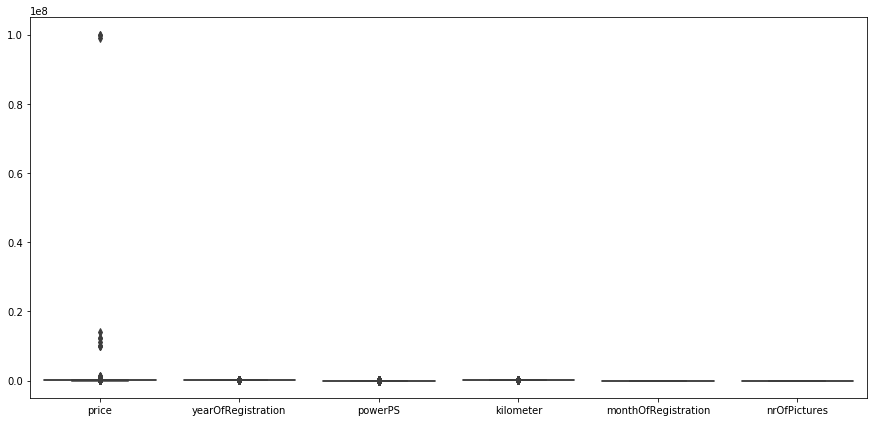

In [13]:
plt.figure(figsize=(15,7))
sns.boxplot(data=df[numerical_columns])
plt.show()

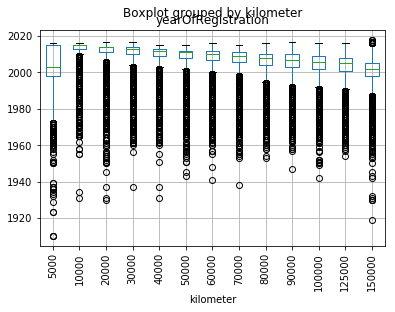

In [14]:
df.boxplot(column='yearOfRegistration',by='kilometer',rot=90)
plt.show()

In [15]:
scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns]) # Нормализация
df.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures
count,260952.000000,260952.000000,260952.000000,260952.000000,260952.000000,260952.0
mean,0.000082,0.863977,0.006317,0.821096,0.515214,0.0
std,0.003433,0.060298,0.007264,0.274813,0.289281,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000015,0.824074,0.003900,0.655172,0.250000,0.0
50%,0.000039,0.870370,0.005800,1.000000,0.500000,0.0
75%,0.000086,0.907407,0.007500,1.000000,0.750000,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


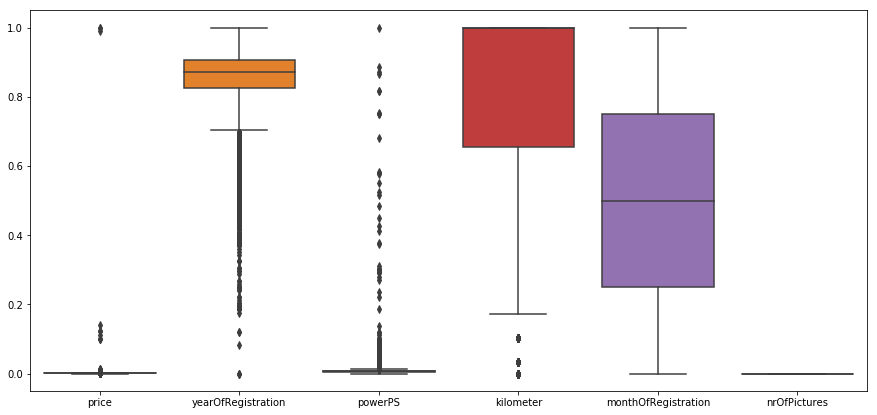

In [16]:
plt.figure(figsize=(15,7))
sns.boxplot(data=df[numerical_columns])
plt.show()

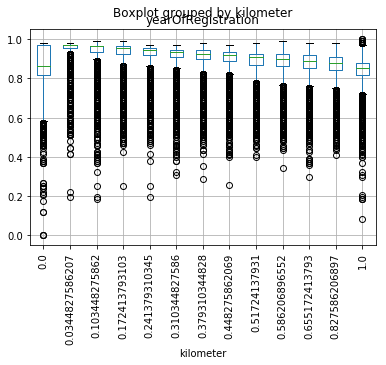

In [17]:
df.boxplot(column='yearOfRegistration',by='kilometer',rot=90)
plt.show()

# 4. Выполните замену категориальных признаков. Выберите и обоснуйте способ замены

In [18]:
for i in categorial_columns:
    print(i,': ', df[i].unique())

seller :  ['privat' 'gewerblich']
abtest :  ['test' 'control']
vehicleType :  ['kleinwagen' 'limousine' 'cabrio' 'kombi' 'suv' 'bus' 'coupe' 'andere']
gearbox :  ['manuell' 'automatik']
fuelType :  ['benzin' 'diesel' 'lpg' 'andere' 'hybrid' 'cng' 'elektro']
brand :  ['volkswagen' 'skoda' 'bmw' 'peugeot' 'mazda' 'nissan' 'renault' 'ford'
 'mercedes_benz' 'seat' 'honda' 'fiat' 'mini' 'opel' 'smart' 'audi'
 'alfa_romeo' 'subaru' 'mitsubishi' 'hyundai' 'volvo' 'lancia' 'porsche'
 'citroen' 'toyota' 'kia' 'chevrolet' 'dacia' 'suzuki' 'daihatsu'
 'chrysler' 'jaguar' 'rover' 'jeep' 'saab' 'daewoo' 'land_rover' 'trabant'
 'lada']
notRepairedDamage :  ['nein' 'ja']


In [19]:
binary_columns = [i for i in categorial_columns if len(df[i].unique()) == 2] #  Бинарные признаки
nonbinary_columns = [i for i in categorial_columns if len(df[i].unique()) > 2] #  Не бинарные признаки

# Бинарные признаки заменяются на 0 и 1
for col in binary_columns:
    for i, unic_item in enumerate(df[col].unique()):
        df[col] = df[col].replace(to_replace=[unic_item], value=[i])
        
# Для не бинарных признаков применяется dummy-кодирование
df_nonbinary = pd.get_dummies(df[nonbinary_columns])
df.drop(nonbinary_columns, axis=1, inplace=True)
df = pd.concat([df_nonbinary, df] , axis=1) # Соединение таблиц

print(df.shape)
df.head()

(260952, 64)


,vehicleType_andere,vehicleType_bus,vehicleType_cabrio,vehicleType_coupe,vehicleType_kleinwagen,vehicleType_kombi,vehicleType_limousine,vehicleType_suv,fuelType_andere,fuelType_benzin,...,seller,price,abtest,yearOfRegistration,gearbox,powerPS,kilometer,monthOfRegistration,notRepairedDamage,nrOfPictures
3,0,0,0,0,1,0,0,0,0,1,...,0,0.000015,0,0.842593,0,0.00375,1.000000,0.500000,0,0.0
4,0,0,0,0,1,0,0,0,0,0,...,0,0.000036,0,0.907407,0,0.00345,0.586207,0.583333,0,0.0
5,0,0,0,0,0,0,1,0,0,1,...,0,0.000007,0,0.787037,0,0.00510,1.000000,0.833333,1,0.0
6,0,0,1,0,0,0,0,0,0,1,...,0,0.000022,0,0.870370,0,0.00545,1.000000,0.666667,0,0.0
7,0,0,0,0,0,0,1,0,0,1,...,0,0.000000,0,0.648148,0,0.00250,0.241379,0.583333,0,0.0


# 5. Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других

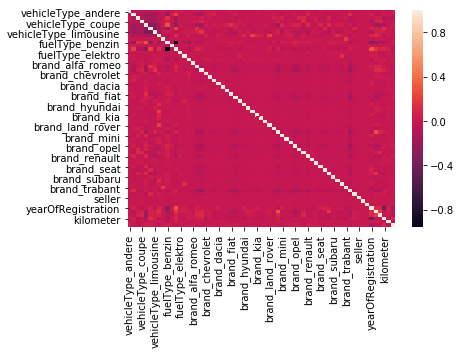

In [20]:
corr_matrix = df.drop(['nrOfPictures'], axis=1).corr()
sns.heatmap(corr_matrix)

# 6. Заполните пропущенные значения в данных

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260952 entries, 3 to 371527
Data columns (total 64 columns):
vehicleType_andere        260952 non-null uint8
vehicleType_bus           260952 non-null uint8
vehicleType_cabrio        260952 non-null uint8
vehicleType_coupe         260952 non-null uint8
vehicleType_kleinwagen    260952 non-null uint8
vehicleType_kombi         260952 non-null uint8
vehicleType_limousine     260952 non-null uint8
vehicleType_suv           260952 non-null uint8
fuelType_andere           260952 non-null uint8
fuelType_benzin           260952 non-null uint8
fuelType_cng              260952 non-null uint8
fuelType_diesel           260952 non-null uint8
fuelType_elektro          260952 non-null uint8
fuelType_hybrid           260952 non-null uint8
fuelType_lpg              260952 non-null uint8
brand_alfa_romeo          260952 non-null uint8
brand_audi                260952 non-null uint8
brand_bmw                 260952 non-null uint8
brand_chevrolet          

* Пропущенных данных нет

# 7. Решите поставленную задачу регрессии в соответствии с заданием. При подборе параметров метода принятия решения (метода регрессии) используйте перекрёстную проверку (изучите возможные для изменения параметры метода регрессии). Вычислите точность решения задачи, вычислив разницу между реальным значением и предсказанным. Вычислите коэффициент корреляции (Пирсона, Спирмена) между реальным значением и предсказанным с учётом p-value

In [22]:
from  sklearn import linear_model

* Линейная регрессия без регуляризаторов

In [23]:
X, y = df.drop(['price'], axis=1), df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

reg = linear_model.LinearRegression()
reg.fit(X_train,y_train)
pred_reg = reg.predict(X_test)
print(pred_reg[:15] - y_test[:15])

173420   -0.000007
182741   -0.000100
271616   -0.000042
218173    0.000011
361460   -0.000031
45771    -0.000034
297004    0.000044
58119    -0.000008
304305    0.000055
183986   -0.000010
274833    0.000051
346765   -0.000058
237316   -0.000016
107975   -0.000007
241922   -0.000035
Name: price, dtype: float64


In [24]:
# Корреляция
P, p_value_P = pearsonr(pred_reg, y_test)
S, p_value_S = spearmanr(pred_reg, y_test)
print(f"Pearson correlation: {P} p_value: {p_value_P}\nSpearmen correlation: {S} p_value: {p_value_S}")

Pearson correlation: 0.014859864802530365 p_value: 3.2118773791058375e-05
Spearmen correlation: 0.6747573085229398 p_value: 0.0


* Линейная регрессия, RIDGE регуляризатор

In [26]:
import warnings
warnings.filterwarnings("ignore")

reg = linear_model.Ridge()
params = {'alpha': np.arange(0, 3, 0.05)}
reg_grid = GridSearchCV(reg, params)
reg_grid.fit(X_train, y_train)
best_alpha = reg_grid.best_estimator_.alpha
print('best alpha:', best_alpha)

best alpha: 0.2


In [27]:
reg = linear_model.Ridge(alpha=best_alpha)
reg.fit(X_train,y_train)
pred_reg = reg.predict(X_test)
print(pred_reg[:15] - y_test[:15])

173420   -0.000008
182741   -0.000100
271616   -0.000042
218173    0.000011
361460   -0.000031
45771    -0.000034
297004    0.000044
58119    -0.000008
304305    0.000055
183986   -0.000010
274833    0.000051
346765   -0.000058
237316   -0.000016
107975   -0.000007
241922   -0.000035
Name: price, dtype: float64


In [28]:
# Корреляция
P, p_value_P = pearsonr(pred_reg, y_test)
S, p_value_S = spearmanr(pred_reg, y_test)
print(f"Pearson correlation: {P} p_value: {p_value_P}\nSpearmen correlation: {S} p_value: {p_value_S}")

Pearson correlation: 0.014861507406875413 p_value: 3.2054223771089144e-05
Spearmen correlation: 0.6744601887769776 p_value: 0.0
